<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS05_TG_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

Introduction
In this lab, we will directly practice building a K-Means model using Python. We will use a simple case study with the Iris dataset.

# **Step 1 - Import Library**
Import required libraries

In [2]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Step 2 - Load Data and Inspection**

At this stage, we will load the data into a dataframe and then inspect the first 5 rows.

In [5]:
df = pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Next, inspect the data Information
df.info()

#It was found that there are 150 data points
#and no missing values in any of the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Step 3 - Features Selection**

Since we only need the features for the clustering process, we need to separate the features and labels using data slicing.

In [8]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


# **Step 4 - Plotting**

At this stage, we will create a scatter plot to visualize the data distribution based on two features: SepalLengthCm and SepalWidthCm.

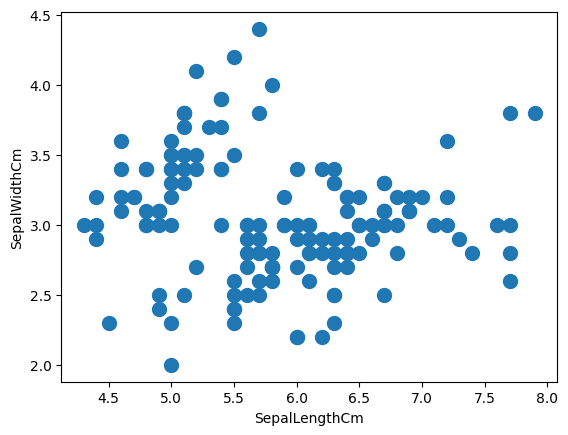

In [9]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

# **Step 5 - Build K-Means Model**

Next, we will build a K-Means model with the assumption of two clusters, based on the visual observation from the scatter plot.

In [10]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

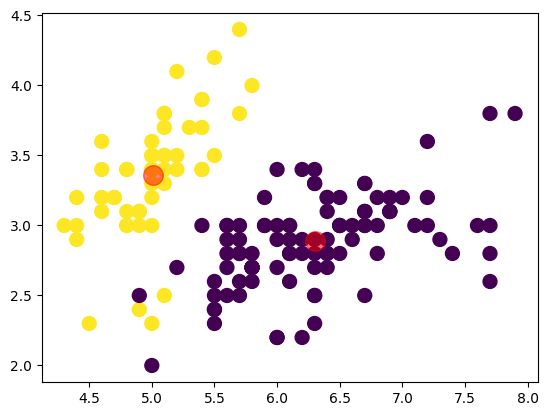

In [11]:
#After the model learns from the data using the fit_predict() function, we can check the clustering results by using a scatter plot.

# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# **Step 6 - Model Evaluation**

To determine whether the resulting clustering model performs well, we need to carry out an evaluation process. One of the evaluation metrics we can use is the Sum of Squared Errors (SSE). To obtain the SSE value, we simply access the inertia_ property of the trained K-Means object.

In [12]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


# **Step 7 - Find The Best *K* Using Elbow Method**

When building a clustering model, if we have not yet determined the number of clusters to use, we can apply the Elbow Method to find the optimal number of clusters. The working steps of the Elbow Method are quite simple:

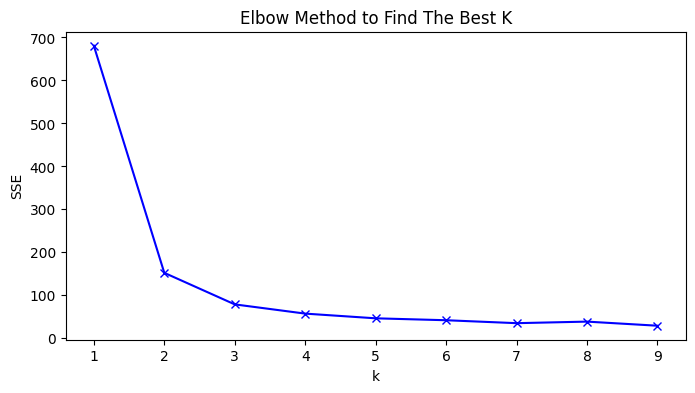

In [13]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

# **Lab 2**

What if the data is not linearly separable?


# **Step 1 - Build Synthetic Data**

Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

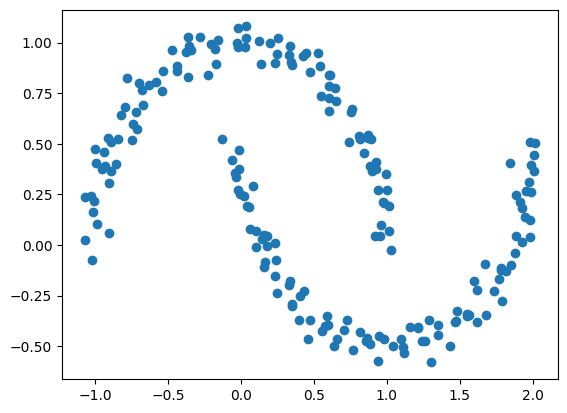

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

#Plot the data to visualize the resulting dataset.
plt.scatter(X[:, 0], X[:, 1])

# **Step 2 - Clustering Using K-Means**

Build a K-Means model,

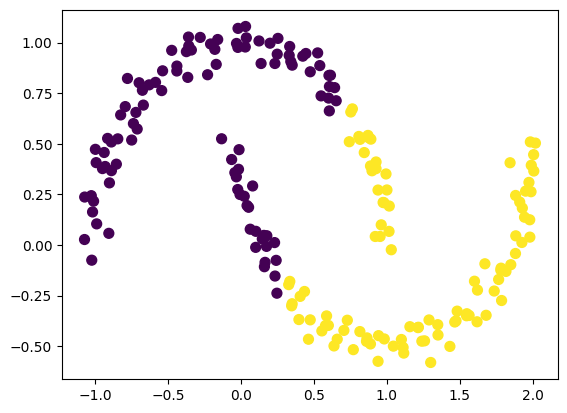

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [17]:
#Silhoutte Coefficient

from sklearn.metrics import silhouette_score
print(silhouette_score(X, cluster))

0.49215648268306905


# **Step 3 - Clustering Using DBSCAN**

Next, we will perform clustering using DBSCAN. Remember, DBSCAN is very sensitive to the parameters epsilon (ε) and min_samples!

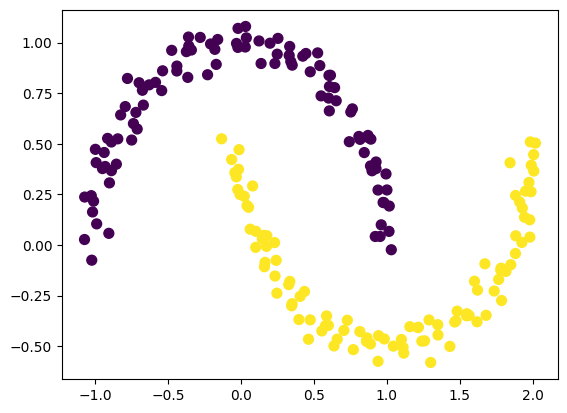

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [19]:
#Silhoutte Score

from sklearn.metrics import silhouette_score
print(silhouette_score(X, cluster_db))

0.32585318950197517


In [20]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.1622685374061352


# **Lab 3**

Clustering on Images Compression

Step 1 - Load The Data

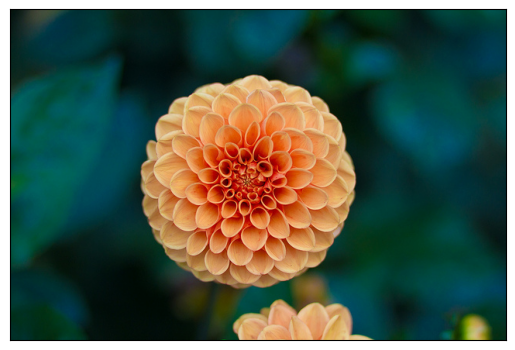

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

# **Step 2 - Preprocessing**

In this step, we will perform normalization and resizing to the image

In [22]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


# **Step 3 - Check Color Distribution**

Create this following function,

In [27]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);



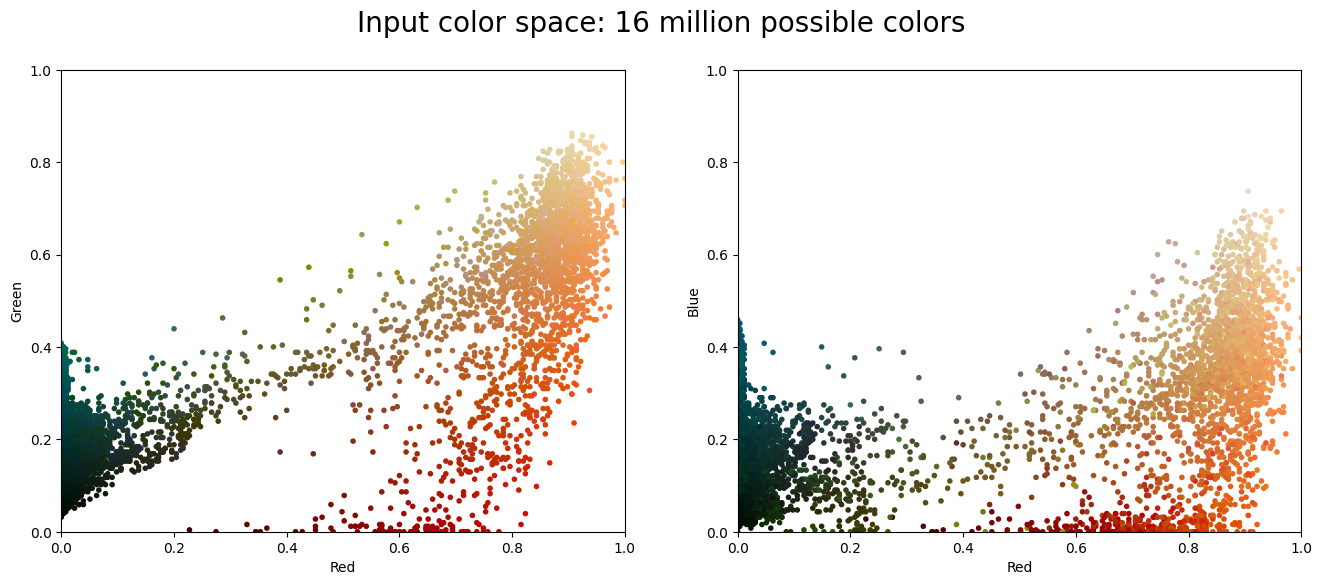

In [28]:
 plot_pixels(data, title='Input color space: 16 million possible colors')

# **Step 4 - Color Clustering Based on Similarity**

We wiil reduce the image colors only to 16 colors

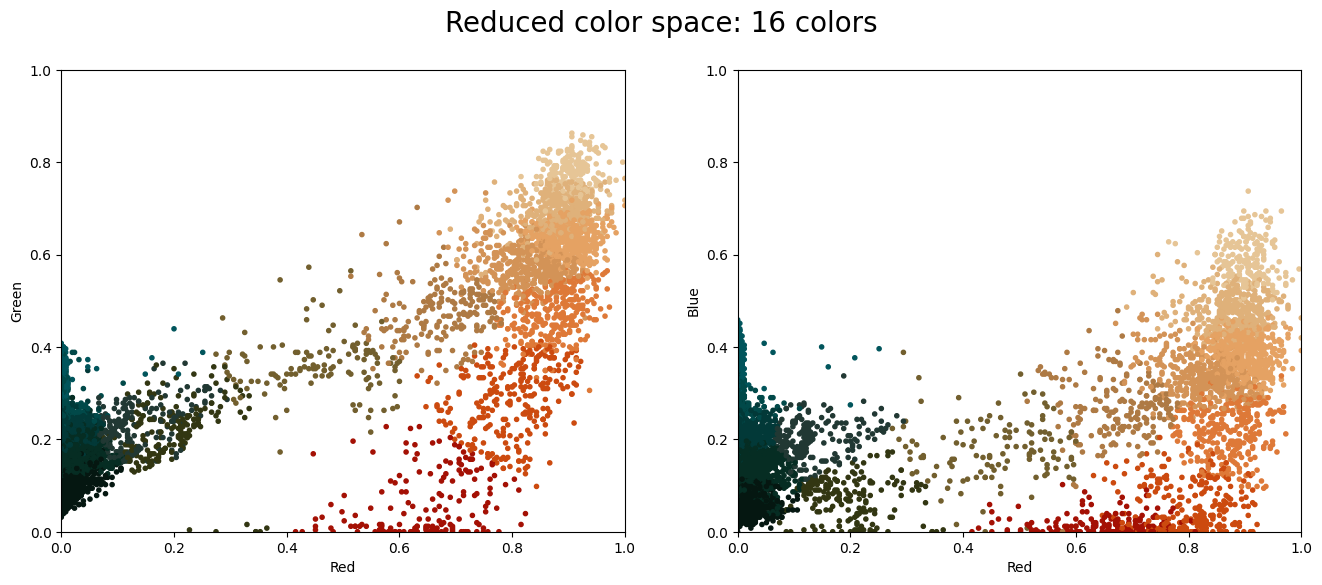

In [29]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

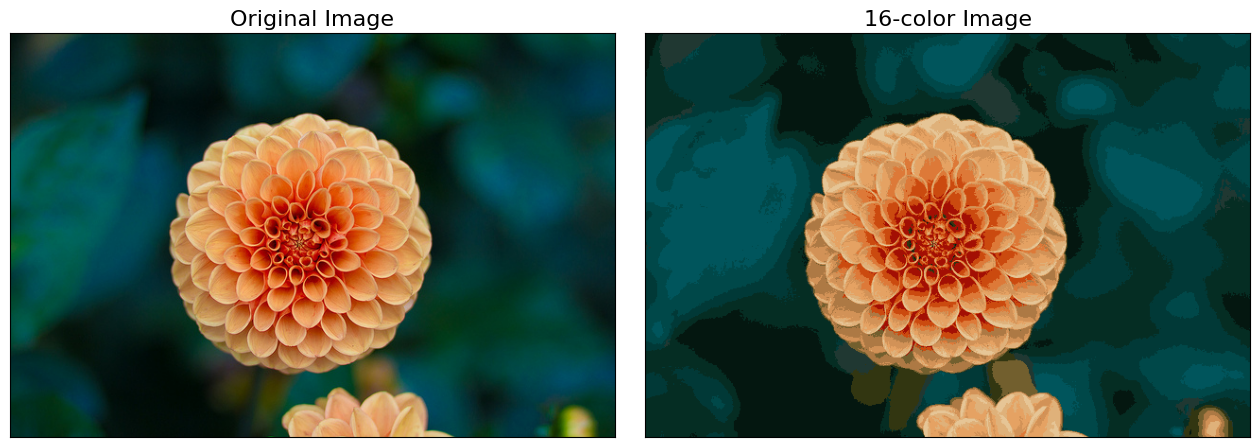

In [30]:
#Next, we will compare the original image and color-reduced image,

flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# **Lab Assignment**

Credit card customer analysis

1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

Dataset loaded successfully.


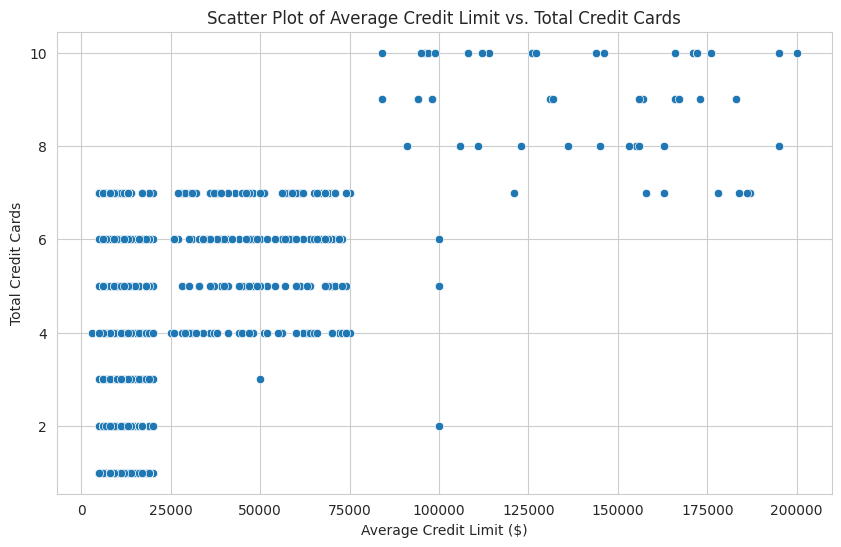

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better visualization
sns.set_style("whitegrid")

# Load the dataset
try:
    df = pd.read_csv('/content/sample_data/CC_Customer_Dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'CC_Customer_Dataset.csv' not found. Please ensure the file is in the same directory.")
    exit()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=df)
plt.title('Scatter Plot of Average Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.show()


**Analysis of linearity**

Analysis of the scatter plot the data distribution of Avg_Credit_Limit and Total_Credit_Cards does not appear to be linear the points are scattered and do not follow a clear straight line. The data seems to form distinct groups or clusters, suggesting that a linear model would not be appropriate for describing the relationship between these two variables.


2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value

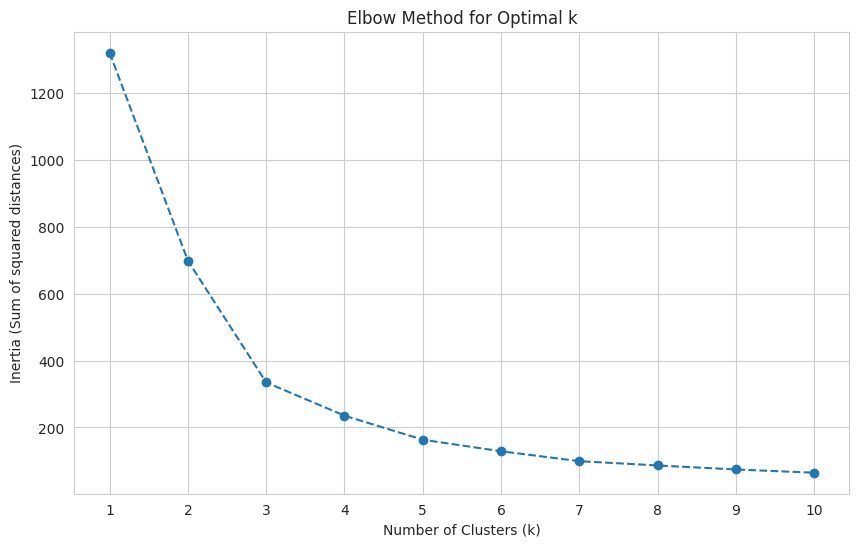

In [54]:
# Select the features for K-Means (Avg_Credit_Limit and Total_Credit_Cards)
X_kmeans = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_kmeans_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



**Explanation for choosing K :**

The Elbow Method plot shows the inertia value the sum of squared distances of samples to their closest cluster center for each number of clusters. The 'elbow' or bend in the curve indicates a point where adding more clusters no longer significantly decreases the inertia.

Based on the graph, the most significant drop in inertia occurs at k=3. After this point, the curve flattens out, indicating diminishing returns for adding more clusters. Therefore, k=3 is the optimal number of clusters for this dataset.

3. Visualize the clustering results from the K-Means model using a scatter plot.

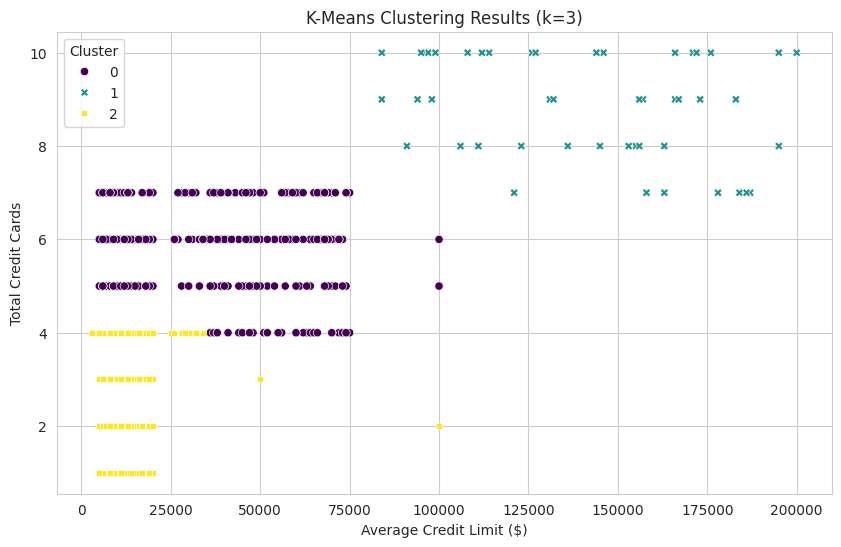

In [46]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

# Task 3: Visualize the K-Means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='KMeans_Cluster', data=df, palette='viridis', style='KMeans_Cluster')
plt.title(f'K-Means Clustering Results (k={optimal_k})')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

4. Build a clustering model using DBSCAN with all available variables.

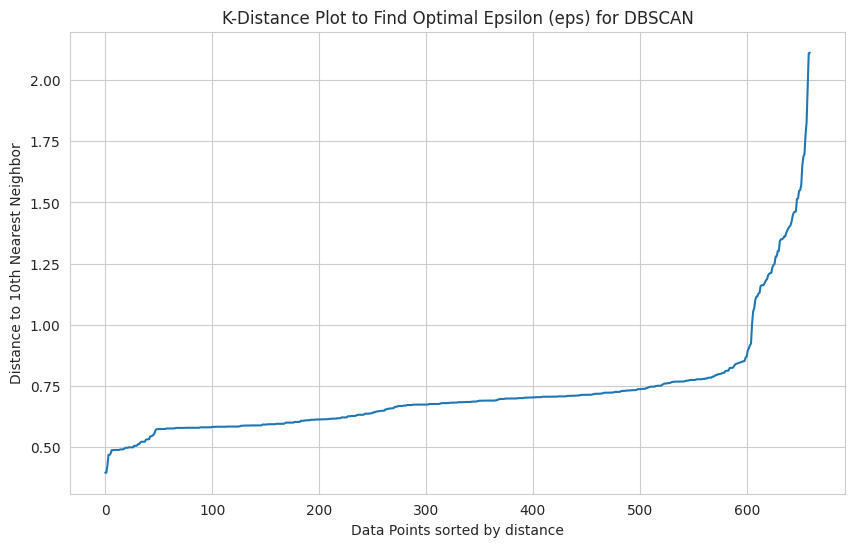

Explanation for choosing epsilon (eps):
The plot above shows the distance of each data point to its 10th nearest neighbor, sorted in ascending order. The 'elbow' in this curve suggests a good value for 'eps'. The value right before the steep rise is a good candidate.
Looking at the plot, a good 'elbow' appears around a distance of 0.8. We will use this as our epsilon value.
DBSCAN clustering applied with eps=0.8 and min_samples=10.
Number of clusters found by DBSCAN: 1 (excluding noise).
Number of noise points (assigned to cluster -1): 54


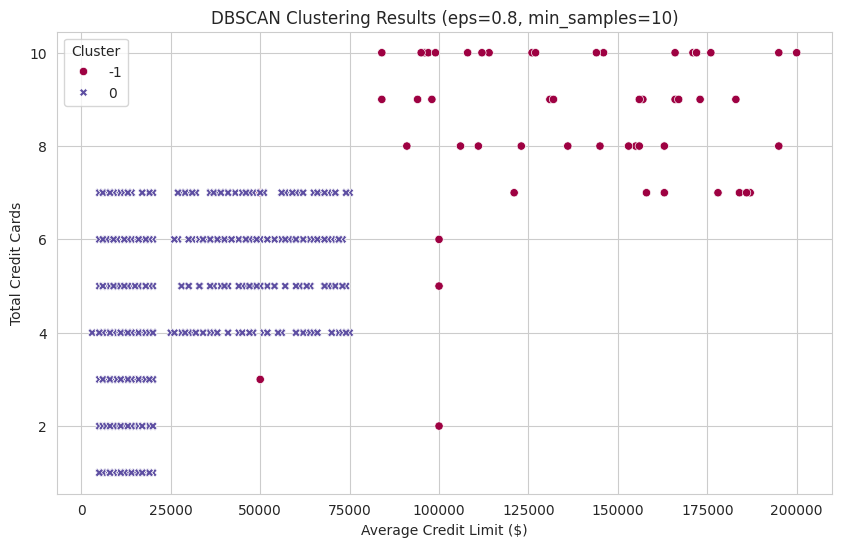

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select all relevant numerical features for DBSCAN
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df_scaled = StandardScaler().fit_transform(df[features])

# Determine optimal DBSCAN parameters using a k-distance plot
min_samples = 2 * df_scaled.shape[1] # Rule of thumb: 2 * number of features

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, min_samples - 1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'K-Distance Plot to Find Optimal Epsilon (eps) for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

print("Explanation for choosing epsilon (eps):")
print("The plot above shows the distance of each data point to its 10th nearest neighbor, sorted in ascending order. The 'elbow' in this curve suggests a good value for 'eps'. The value right before the steep rise is a good candidate.")
print("Looking at the plot, a good 'elbow' appears around a distance of 0.8. We will use this as our epsilon value.")
eps_value = 0.8

# Build the DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

print(f"DBSCAN clustering applied with eps={eps_value} and min_samples={min_samples}.")
print(f"Number of clusters found by DBSCAN: {len(np.unique(df['DBSCAN_Cluster'])) - 1} (excluding noise).")
print(f"Number of noise points (assigned to cluster -1): {list(df['DBSCAN_Cluster']).count(-1)}")

# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='DBSCAN_Cluster', data=df, palette='Spectral', style='DBSCAN_Cluster')
plt.title(f'DBSCAN Clustering Results (eps={eps_value}, min_samples={min_samples})')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

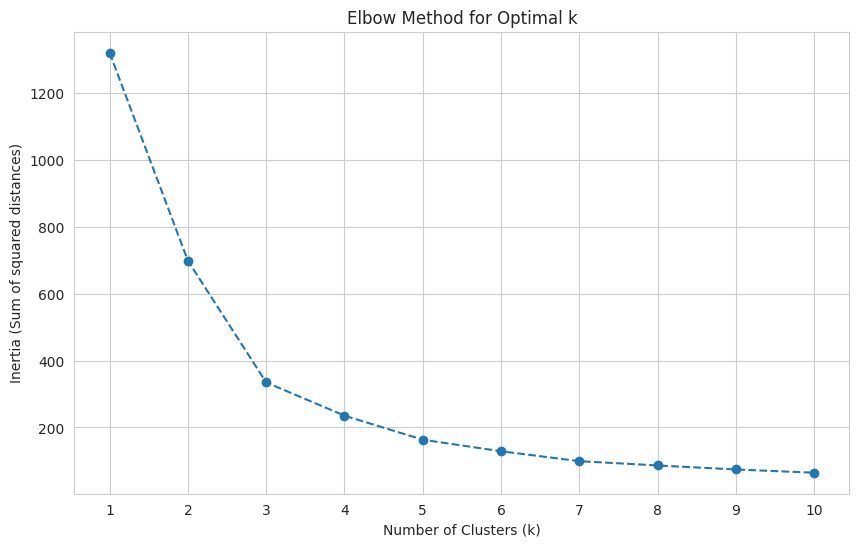

In [53]:
# Select the features for K-Means (Avg_Credit_Limit and Total_Credit_Cards)
X_kmeans = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_kmeans_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Explanation for choosing k**

The Elbow Method plot shows the inertia value the sum of squared distances of samples to their closest cluster center for each number of clusters. The 'elbow' or bend in the curve indicates a point where adding more clusters no longer significantly decreases the inertia.
Based on the graph, the most significant drop in inertia occurs at k=3. After this point, the curve flattens out, indicating diminishing returns for adding more clusters. Therefore, k=3 is the optimal number of clusters for this dataset.

6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# DBSCAN assigns -1 to noise points.
# We need at least two clusters (excluding noise) to calculate these metrics.
# Check if there are at least two clusters (excluding noise)
unique_labels_tuned = np.unique(df['DBSCAN_Cluster'])
num_clusters_tuned = len(unique_labels_tuned) - (1 if -1 in unique_labels_tuned else 0)

print(f"Number of clusters found with tuned parameters (excluding noise): {num_clusters_tuned}")
print(f"Unique labels found with tuned parameters: {unique_labels_tuned}")


if num_clusters_tuned >= 2:
    # Filter out noise points for evaluation metrics calculation
    # Ensure we are using the scaled data df_scaled for evaluation
    X_clustered_tuned = df_scaled[df['DBSCAN_Cluster'] != -1]
    labels_clustered_tuned = df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]

    # Calculate Silhouette Score
    silhouette_avg_tuned = silhouette_score(X_clustered_tuned, labels_clustered_tuned)
    print(f"Silhouette Score (tuned): {silhouette_avg_tuned}")

    # Calculate Davies-Bouldin Index
    db_index_tuned = davies_bouldin_score(X_clustered_tuned, labels_clustered_tuned)
    print(f"Davies-Bouldin Index (tuned): {db_index_tuned}")
else:
    print("Not enough clusters (excluding noise) to compute Silhouette Score and Davies-Bouldin Index with tuned parameters.")

Number of clusters found with tuned parameters (excluding noise): 1
Unique labels found with tuned parameters: [-1  0]
Not enough clusters (excluding noise) to compute Silhouette Score and Davies-Bouldin Index with tuned parameters.
